In [48]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns

In [49]:
data=pd.read_csv("/content/UniversalBank.csv")

In [50]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [51]:
data.count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [52]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [53]:
len(data.columns) #kolom

14

In [54]:
len(data) #baris

5000

In [55]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [56]:
data.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [57]:
data.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1754,1755,50,24,80,95616,4,4.9,1,0,0,0,0,1,0
2890,2891,48,24,18,94304,4,0.2,1,0,0,0,0,1,1
2926,2927,53,28,44,92152,2,0.6,3,0,0,0,0,1,1
1531,1532,39,13,25,90304,4,1.5,3,0,0,0,0,1,0
818,819,51,27,42,95039,4,1.1,2,0,0,0,0,1,1
1294,1295,34,10,71,95003,1,0.1,1,257,0,0,0,1,1
684,685,43,17,164,90266,1,2.4,1,449,0,0,0,1,0
4728,4729,59,35,31,90630,3,0.4,2,0,0,0,0,1,0
3154,3155,27,1,99,94305,1,3.0,3,149,1,0,0,0,1
522,523,36,11,72,91007,1,2.8,1,224,0,0,0,0,0


In [58]:
np.where(pd.isnull(data))

(array([], dtype=int64), array([], dtype=int64))

In [59]:
data_clean = data.dropna()
print(data_clean)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0            

In [60]:
data_clean = data_clean.drop(columns=['ID','ZIP Code'])

In [61]:
print(data_clean)

      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0    

In [62]:
data_clean.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [64]:
data2 = data_clean.drop_duplicates()

In [65]:
print(data2)

      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0    

In [66]:
data2.value_counts()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard
23   -3          55      3       2.4    2          145       0              0                   0           1       0             1
52    27         43      4       0.2    2          0         0              0                   0           0       1             1
                 65      1       1.2    1          0         0              0                   0           1       1             1
                 62      4       1.8    3          82        0              0                   0           0       0             1
                 61      4       1.8    3          207       0              0                   0           0       0             1
                                                                                                                                 ..
39    14         40      1       2.5    3          0         0              0    

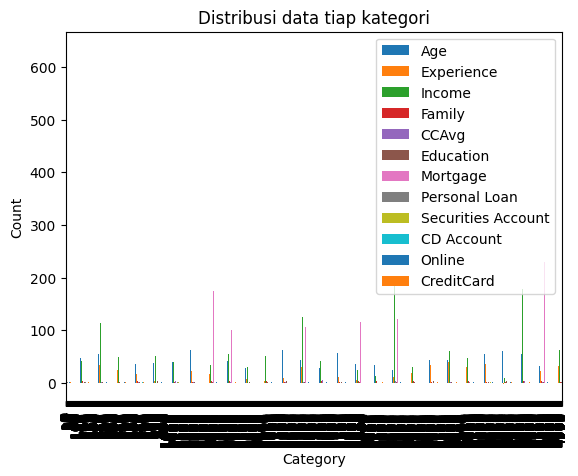

In [68]:
data2.plot(kind='bar')
plt.title('Distribusi data tiap kategori')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [75]:
data2.to_csv("21n10018_universalbank.csv",index=False)

<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

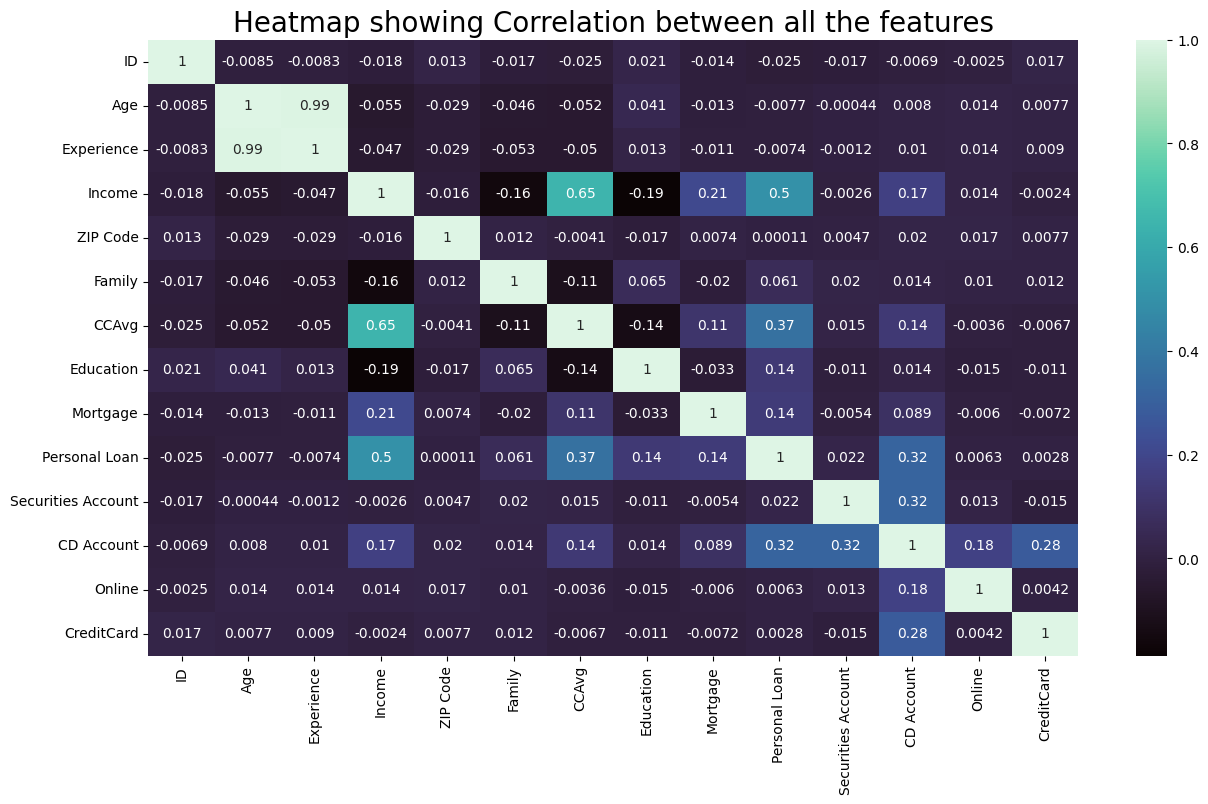

In [76]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(data.corr(),annot = True, cmap='mako')

<Axes: title={'center': 'Heatmap showing Correlation between all the features (dropped columns)'}>

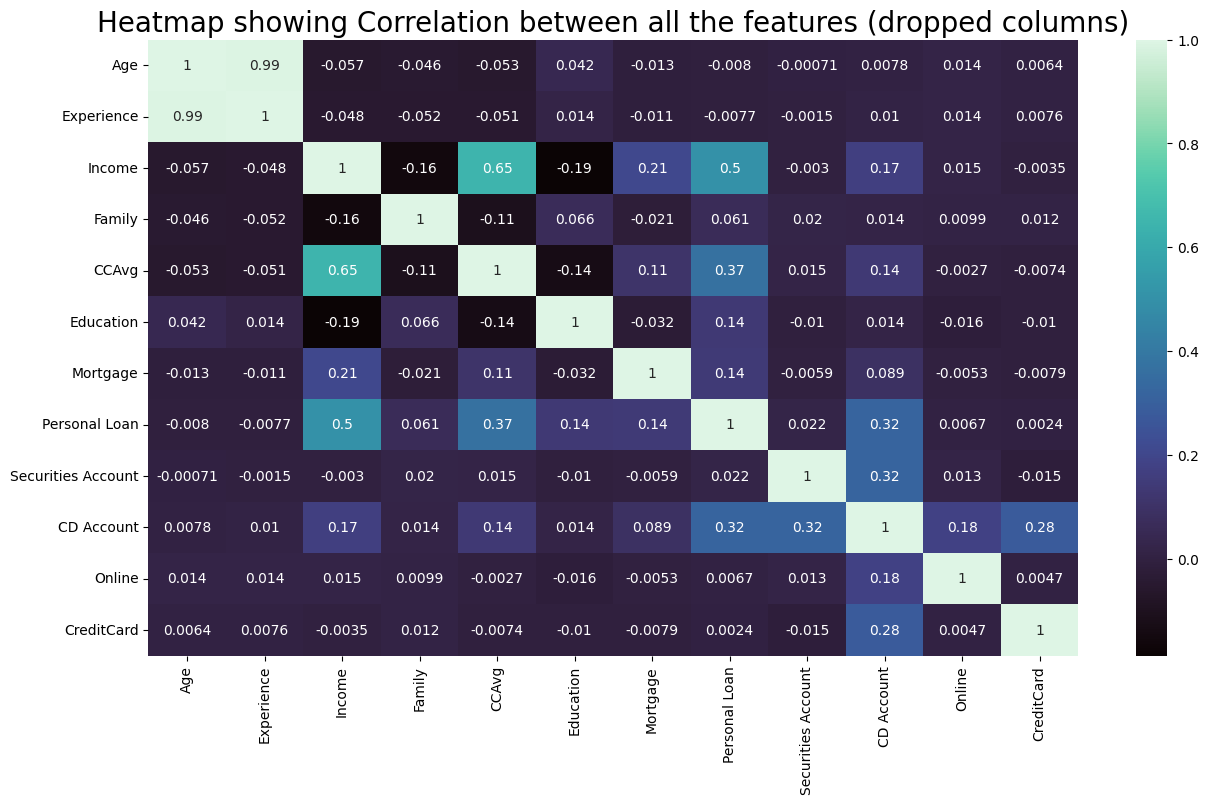

In [77]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features (dropped columns)", fontsize=20)
sns.heatmap(data2.corr(),annot = True, cmap='mako')

In [79]:
X = data2[['Age', 'Experience', 'Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online']]
y = data2['CreditCard']
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X contains your features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = svm.SVC(kernel='linear')

# Train the SVM using cluster assignments as the target variable
svm_classifier.fit(X_train, y_train)

# Predict the cluster assignments for the test set
clusters_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the clustering
accuracy = accuracy_score(y_test, clusters_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7555110220440882


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clusters_pred))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       715
           1       0.82      0.18      0.29       283

    accuracy                           0.76       998
   macro avg       0.79      0.58      0.57       998
weighted avg       0.77      0.76      0.69       998



In [81]:
from sklearn.metrics import confusion_matrix, classification_report

Confusion Matrix:
[[704  11]
 [233  50]]


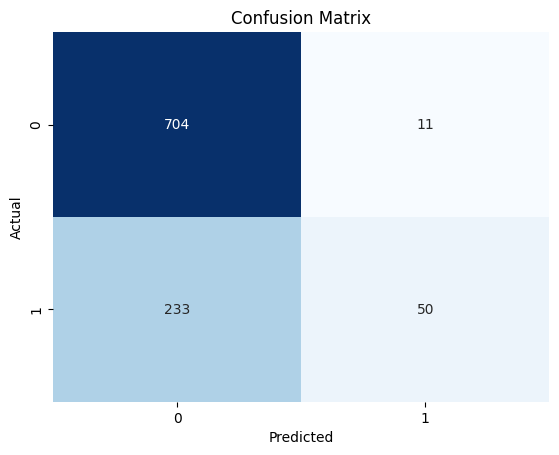

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       715
           1       0.82      0.18      0.29       283

    accuracy                           0.76       998
   macro avg       0.79      0.58      0.57       998
weighted avg       0.77      0.76      0.69       998



In [86]:

y_pred = svm_classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))